PROG74010 Data Project - Phase 1

Amanuel Negussie, Cyril Kamal, Jacky Lam

# Telecommunication Customer Churn

For this data project, we are a telecommunication company in California, United States. The company have notice a trend of customer churn in the past month. To address this issue, we have collected customer information and initiated an investigation into its root causes.

## Problem Definition

Customer churn which is the rate customers cancel their service with the company is an important issue for telecom companies. Finding the customers that are most likely to churn before they do lets companies take proactive action to keep their users. By keeping the users, they reduce revenue loss and keep a loyal customer base. The challenge is identifying the trends of churn in the data accurately based on customer attributes and behaviors.


The aspect of this problem broken down are:

- **Finding Churn Signs**: Finding what factors contribute to customer churn.

- **Impact**: Estimating the financial consequences of churn and the benefits of reducing churn for the telecom company.

- **Retention**: Creating retention strategies to prevent churn based on the findings.

The purpose of this project is to use data visualization and exploratory data analysis techniques learned in class to identify customers who might churn. By identifying possible churn, telecom companies can take proactive action to keep the customers and satisfaction and profitability. 

## Data Collection

### Data Source

The Telecommunications Industry Sample Data dataset we are using for the project is downloaded from [IBM (Link)](https://accelerator.ca.analytics.ibm.com/bi/?perspective=authoring&pathRef=.public_folders%2FIBM%2BAccelerator%2BCatalog%2FContent%2FDAT00148&id=i9710CF25EF75468D95FFFC7D57D45204&objRef=i9710CF25EF75468D95FFFC7D57D45204&action=run&format=HTML&cmPropStr=%7B%22id%22%3A%22i9710CF25EF75468D95FFFC7D57D45204%22%2C%22type%22%3A%22reportView%22%2C%22defaultName%22%3A%22DAT00148%22%2C%22permissions%22%3A%5B%22execute%22%2C%22read%22%2C%22traverse%22%5D%7D). The dataset contains a fictional telco company's customer churn data and we will use this dataset for our exploratory data analysis scenario.

The original dataset package contains 7 excel spreadsheet, two of which are a combination of other 5 "raw" data. The 5 "raw" datasets are: *customer demographics*, *customer location*, *location population*, *customer telco services*, *customer churn status*. 

We will be using the following three datasets for our project: *customer demographics*, *customer telco services*, *customer churn status*. We selected these three because they are more relevant to the problem that we are trying to solve. 

The author didn't specifically state how the data was collected. However, we are going to assume the collection method with basic common sense and personal experience of how a telco company might collect customer information for our project scenario.



**Customer Demographics Data**

Customer demographics data are gathered from the existing customer database. These demographics data are generated when customers sign up for telco services with the company, and they typically provide basic demographic information such as age and gender. The data is collected during either a online sign up process or in physical store locations, the information is verifed with government issued id for authenticity.

**Customer Telco Services Data**

Customer Telco Services Data are gathered from the existing customer database. These telco services data are generated by tracking customers' plans and subscriptions usage through the company's billing and customer management system.

**Customer Churn Status Data**

Customer Churn Status Data is gathered from the existing customer database. These Churn Status Data are generated when a customer cancels their plan or subscription with the company through various channels, and during the process the customer would receive a small survey asking their reason for leaving, the result is then recorded in the customer database.

### Importing Data

We are going to read the excel spreadsheet from file and put them in into a dataframe.

In [37]:
import pandas as pd

In [38]:
df_customer_demographics = pd.read_excel("Telco_customer_churn_demographics.xlsx")
df_customer_telco_services = pd.read_excel("Telco_customer_churn_services.xlsx")
df_customer_churn_status = pd.read_excel("Telco_customer_churn_status.xlsx")

### Features

Now let's look at the features of each dataset.

**Customer Demographics Data**

In [39]:
pd.set_option('display.max_columns', None)
df_customer_demographics.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [40]:
df_customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


**Customer Telco Services Data**

In [41]:
df_customer_telco_services.head()

,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,EROZQXDUU4979,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,GEEYSJUHY6991,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [42]:
df_customer_telco_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Service ID                         7043 non-null   object 
 1   Customer ID                        7043 non-null   object 
 2   Count                              7043 non-null   int64  
 3   Quarter                            7043 non-null   object 
 4   Referred a Friend                  7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              3166 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

**Customer Churn Status Data**

In [43]:
df_customer_churn_status.head()

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [44]:
df_customer_churn_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Status ID           7043 non-null   object
 1   Customer ID         7043 non-null   object
 2   Count               7043 non-null   int64 
 3   Quarter             7043 non-null   object
 4   Satisfaction Score  7043 non-null   int64 
 5   Customer Status     7043 non-null   object
 6   Churn Label         7043 non-null   object
 7   Churn Value         7043 non-null   int64 
 8   Churn Score         7043 non-null   int64 
 9   CLTV                7043 non-null   int64 
 10  Churn Category      1869 non-null   object
 11  Churn Reason        1869 non-null   object
dtypes: int64(5), object(7)
memory usage: 660.4+ KB


We can see the datasets has a mix of integer numbers, float numbers, and strings There are also few columns with missing values, namely Offer and Internet Type in Telco Services Data, also Churn Category and Churn Reason in Churn Status Data. We will deal with them when we do data prepration.

### Column Breakdown


Now, let's look at the unique values of each column and the statistical measurements of the three datasets to get more insight of the dataset.

**Customer Demographics Data**

In [45]:
for col in df_customer_demographics.columns:
    print(f"{col}': {df_customer_demographics[col].value_counts()}\n")

Customer ID': Customer ID
8779-QRDMV    1
9817-APLHW    1
5447-VYTKW    1
8871-JLMHM    1
7029-IJEJK    1
             ..
5493-SDRDQ    1
9249-FXSCK    1
3063-QFSZL    1
8364-TRMMK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Count': Count
1    7043
Name: count, dtype: int64

Gender': Gender
Male      3555
Female    3488
Name: count, dtype: int64

Age': Age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
66     63
78     63
67     61
72     58
Name: count, Length: 62, dtype: int64

Under 30': Under 30
No     5642
Yes    1401
Name: count, dtype: int64

Senior Citizen': Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

Married': Married
No     3641
Yes    3402
Name: count, dtype: int64

Dependents': Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Number of Dependents': Number of Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
8       1
9       1
Name: count, dtype: int64



In [46]:
df_customer_churn_status.describe()

,Count,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,3.244924,0.265370,58.505040,4400.295755
std,0.0,1.201657,0.441561,21.170031,1183.057152
min,1.0,1.000000,0.000000,5.000000,2003.000000
25%,1.0,3.000000,0.000000,40.000000,3469.000000
50%,1.0,3.000000,0.000000,61.000000,4527.000000
75%,1.0,4.000000,1.000000,75.500000,5380.500000
max,1.0,5.000000,1.000000,96.000000,6500.000000


Some notable insights are:
- Customer ID: Each customer has a unique identification number.
- Count: It only has one unique value of "1", meaning this column is the same for each entry, we can remove it to reduce the number of features.
- Age: A normal range of age values
- Under 30: Yes or No
- Senior Citizen: Yes or No
- Married: Yes or No
- Dependents: Yes or No
- Number of Dependents: Most are 3 and under, few of the customers have more 3.

**Customer Telco Services Data**

In [47]:
for col in df_customer_telco_services.columns:
    print(f"{col}': {df_customer_telco_services[col].value_counts()}\n")

Service ID': Service ID
IJKDQVSWH3522    1
ELMERUBJN7237    1
EYJRGFWQQ4261    1
UEHNIPQZD8152    1
UAZWTBDOJ4566    1
                ..
VGCEWDPQK6482    1
CTJJCBARK5166    1
SYAVADJBS9218    1
MXWXNBJUL2712    1
BILLTTPVG8428    1
Name: count, Length: 7043, dtype: int64

Customer ID': Customer ID
8779-QRDMV    1
9817-APLHW    1
5447-VYTKW    1
8871-JLMHM    1
7029-IJEJK    1
             ..
5493-SDRDQ    1
9249-FXSCK    1
3063-QFSZL    1
8364-TRMMK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Count': Count
1    7043
Name: count, dtype: int64

Quarter': Quarter
Q3    7043
Name: count, dtype: int64

Referred a Friend': Referred a Friend
No     3821
Yes    3222
Name: count, dtype: int64

Number of Referrals': Number of Referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64

Tenure in Months': Tenure in Months
1     613
72    362
2     238
3     200
4     176


In [48]:
df_customer_telco_services.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


Some notable insights are:
- Service ID: Same as customer ID, each customer has a unique value.
- Quarter: Same for all entries, it can be removed.
- There are unsually large charges for some customers, it is abnormal for personal or family usage, but it could be justify if it is a business use case.

**Customer Churn Status Data**

In [49]:
for col in df_customer_churn_status.columns:
    print(f"{col}': {df_customer_churn_status[col].value_counts()}\n")

Status ID': Status ID
SWSORB1252    1
QGQNCT8281    1
JJYVZX2887    1
RWXWXP2171    1
TLLJLL7149    1
             ..
YBPJRH5549    1
BYJUBR1948    1
FQXCEF6341    1
FNDPNF4657    1
KCNRPQ8327    1
Name: count, Length: 7043, dtype: int64

Customer ID': Customer ID
8779-QRDMV    1
9817-APLHW    1
5447-VYTKW    1
8871-JLMHM    1
7029-IJEJK    1
             ..
5493-SDRDQ    1
9249-FXSCK    1
3063-QFSZL    1
8364-TRMMK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Count': Count
1    7043
Name: count, dtype: int64

Quarter': Quarter
Q3    7043
Name: count, dtype: int64

Satisfaction Score': Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

Customer Status': Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

Churn Label': Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

Churn Value': Churn Value
0    5174
1    1869
Name: count, dtype: int64

Churn Score': Churn Score
91    202

In [50]:
df_customer_churn_status.describe()

,Count,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,3.244924,0.265370,58.505040,4400.295755
std,0.0,1.201657,0.441561,21.170031,1183.057152
min,1.0,1.000000,0.000000,5.000000,2003.000000
25%,1.0,3.000000,0.000000,40.000000,3469.000000
50%,1.0,3.000000,0.000000,61.000000,4527.000000
75%,1.0,4.000000,1.000000,75.500000,5380.500000
max,1.0,5.000000,1.000000,96.000000,6500.000000


Some notable insights are:
- Customer Status: There are 1869 customer churn, which trasnlate to about 1/4 churn for the past month.
- Churn Value: Numerical representation of Churn Label.
- Churn Score: There are couple single digit number for Churn Score.

## Data Preparation

### Identify Missing Values

**Customer Demographics Data**

In [51]:
df_customer_demographics.isnull().sum()

Customer ID             0
Count                   0
Gender                  0
Age                     0
Under 30                0
Senior Citizen          0
Married                 0
Dependents              0
Number of Dependents    0
dtype: int64

There are no missing values from the customer demographics data.

**Customer Telco Services Data**

In [52]:
df_customer_telco_services.isnull().sum()

Service ID                              0
Customer ID                             0
Count                                   0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                 

There are significant amount of missing values in the column for **Offer** and **Internet Type**, we will investigate in the later section.

**Customer Churn Status Data**

In [53]:
df_customer_churn_status.isnull().sum()

Status ID                0
Customer ID              0
Count                    0
Quarter                  0
Satisfaction Score       0
Customer Status          0
Churn Label              0
Churn Value              0
Churn Score              0
CLTV                     0
Churn Category        5174
Churn Reason          5174
dtype: int64

There are significant amount of missing values in the column for **Churn Category** and **Churn Reason**, we will investigate in the later section.

### Impute Missing Values

**Customer Telco Services Data**

We have missing values in the column Offer and Internet Type, let pick some samples from those entries.

In [54]:
df_customer_telco_services[df_customer_telco_services['Offer'].isnull()].head()

,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65
16,HXMLQEOHF5921,3488-PGMQJ,1,Q3,No,0,8,NaN,Yes,1.78,No,Yes,Fiber Optic,7,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,74.50,606.55,0.0,0,14.24,620.79
23,WIKKPUBDD5531,0623-IIHUG,1,Q3,No,0,21,NaN,No,0.00,No,Yes,Cable,8,Yes,No,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,41.90,840.10,0.0,0,0.00,840.10
24,TKRBOHAOA4185,9057-MSWCO,1,Q3,No,0,27,NaN,No,0.00,No,Yes,Cable,13,Yes,No,No,No,No,No,No,No,Month-to-Month,No,Credit Card,30.75,805.10,0.0,140,0.00,945.10
25,OGTGVNIAI7862,4895-TMWIR,1,Q3,Yes,1,11,NaN,Yes,29.54,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,No,Mailed Check,19.95,214.75,0.0,0,324.94,539.69


Here we are using business rules to impute missing values and we assume that the missing value in the column Offer is representing there isn't an offer for the customer and the data is normal, because other assumptions of missing values doesn't justify the large amount of missing values while other has value with Offer A to E. We will impute these missing value with a categorical representation of Not a Number as "No Offer".

In [55]:
df_customer_telco_services['Offer'].fillna('No Offer', inplace=True)

Let's check the column Offer again after imputation.

In [56]:
df_customer_telco_services['Offer'].isnull().sum()

0

Now, let's handle the missing values in the column Internet Type in the Customer Telco Service Data.

In [57]:
df_customer_telco_services[df_customer_telco_services['Internet Type'].isnull()].head()

,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
25,OGTGVNIAI7862,4895-TMWIR,1,Q3,Yes,1,11,No Offer,Yes,29.54,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,No,Mailed Check,19.95,214.75,0.0,0,324.94,539.69
41,NGGLWVAEL7229,4160-AMJTL,1,Q3,No,0,8,No Offer,Yes,27.95,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,19.65,164.30,0.0,0,223.60,387.90
199,XCKCTMRXO4885,9174-FKWZE,1,Q3,No,0,1,No Offer,Yes,22.92,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,19.45,19.45,0.0,0,22.92,42.37
373,UQBCYBLQP2251,5028-HTLJB,1,Q3,No,0,1,Offer E,Yes,19.87,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,No,Credit Card,20.05,20.05,0.0,0,19.87,39.92
375,CSWPRSYEC1445,6982-UQZLY,1,Q3,Yes,1,1,Offer E,Yes,22.86,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,20.85,20.85,0.0,0,22.86,43.71


Again, we are using business rules to impute missing values and it looks like it is the same case for the column Internet Type as the case of the column Offer, the NaN is a representation of no internet type, and we can see from the Internet Service column that the value is "No". So let's impute the Internet Type column with "N/A" for categorical representation.

In [58]:
df_customer_telco_services['Internet Type'].fillna('N/A', inplace=True)

Let's check the Internet Type column after imputation.

In [59]:
df_customer_telco_services['Internet Type'].isnull().sum()

0

There are significant amount of missing values in the column for **Offer** and **Internet Type**, we will investigate in the later section.

**Customer Telco Services Data**

Now, let's impute missing values for the Churn Category and Churn Reason column the Customer Telco Services Data. Both columns have the same number for missing values, and the count is 5174. This number is equal to the number customers (4720) stayed plus the number of customers joined (454), but let us take a look at samples of data.

In [60]:
df_customer_churn_status[df_customer_churn_status['Churn Category'].isnull()].head()

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
476,XOZICB8671,3841-NFECX,1,Q3,4,Stayed,No,0,38,5309,NaN,NaN
477,SJGVNA3887,4929-XIHVW,1,Q3,5,Joined,No,0,69,4449,NaN,NaN
478,IBNOJY7673,3413-BMNZE,1,Q3,3,Joined,No,0,40,3144,NaN,NaN
479,WGDMSH3435,8012-SOUDQ,1,Q3,4,Stayed,No,0,52,2223,NaN,NaN
480,QWAGNG6814,6575-SUVOI,1,Q3,4,Stayed,No,0,25,3154,NaN,NaN


In [61]:
df_customer_churn_status[df_customer_churn_status['Churn Reason'].isnull()].tail()

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
7038,HNJTLH8249,2569-WGERO,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,SJJDWW6147,6840-RESVB,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,AODCBE7865,2234-XADUH,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,GLQPEW3973,4801-JZAZL,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN
7042,KCNRPQ8327,3186-AJIEK,1,Q3,4,Stayed,No,0,38,5097,NaN,NaN


From the sample, we can see that the missing values for both Churn Category and Churn Reason column goes together, and the Customer Status is either Stayed or Joined, which confirmed my earlier assumption. With that being said, let's replace those values with a categorical  representation so those values of the entries can be used in the later analysis.

In [62]:
df_customer_churn_status['Churn Category'].fillna('N/A', inplace=True)
df_customer_churn_status['Churn Reason'].fillna('N/A', inplace=True)

print(df_customer_churn_status['Churn Category'].isnull().sum(), ",", df_customer_churn_status['Churn Reason'].isnull().sum())

0 , 0


### Removing Irrelevant Features

In the above analysis, we have identified some columns of features that are irrelevant for our analysis, so let's remove them from the dataset to keep things organized.

**Customer Demographics Data**

For the Customer Demographics Data, the column Count is the same for all entries and it is irrelevant for our analysis, and the Dependents column can be represents by value 0 in the Number of Dependents column, so let's drop the columns.

In [63]:
df_customer_demographics.drop(columns=['Count','Dependents'], inplace=True)
df_customer_demographics.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Number of Dependents
0,8779-QRDMV,Male,78,No,Yes,No,0
1,7495-OOKFY,Female,74,No,Yes,Yes,1
2,1658-BYGOY,Male,71,No,Yes,No,3
3,4598-XLKNJ,Female,78,No,Yes,Yes,1
4,4846-WHAFZ,Female,80,No,Yes,Yes,1


**Customer Telco Services Data**

For the Customer Telco Services Data, the Serivce ID column is a index for the dataset, but Customer ID also has unique value for each entry, so we can remove Service ID. For the Count and Quarter column, they are the same for all entries and it is irrelevant for our analysis. Lastly, Referred a Friend column can be represented by the value 0 in the Number of Referrals column. We are going to drop all the mentioned columns.

In [64]:
df_customer_telco_services.drop(columns=['Service ID','Count','Quarter','Referred a Friend'], inplace=True)
df_customer_telco_services.head()

,Customer ID,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,0,1,No Offer,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


**Customer Churn Status Data**

For the Customer Churn Status Data, the Status ID column is a index for the dataset, but Customer ID also has unique value for each entry, so we can remove Service ID. For the Count and Quarter column, they are the same for all entries and it is irrelevant for our analysis. Lastly, Churn Label column can be represented by the value 0 in the Churn Value column. We are going to drop all the mentioned columns.

In [65]:
df_customer_churn_status.drop(columns=['Status ID','Count','Quarter','Churn Label'], inplace=True)
df_customer_churn_status.head()

,Customer ID,Satisfaction Score,Customer Status,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,3,Churned,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,3,Churned,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,2,Churned,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,2,Churned,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,2,Churned,1,67,2793,Price,Extra data charges


Up to here, we have imputed all missing values from the three datasets and removed some irrelevant features to make the dataset more organized and manageable to work on.


To add the investigation of outlier detection methods and comparison of identified outliers to your notebook, you can follow the steps below:

#### Investigate Outlier Detection Methods and Compare Identified Outliers
Now, let's investigate outlier detection methods to identify any outliers present in our data. We will compare the outliers identified by each method to determine a final set of outliers. Additionally, we will justify the selection method used for outlier detection.

Outlier Detection Methods:
1. Z-Score Method: This method identifies outliers based on their deviation from the mean in terms of standard deviations.
2. IQR Method: Interquartile Range method identifies outliers based on the difference between the 75th and 25th percentiles of the data.
Outlier Detection and Comparison:
We will apply both the Z-Score and IQR methods to each dataset and compare the outliers identified by each method. Then, we will determine a final set of outliers based on our investigation.

In [71]:
import numpy as np

# Outlier detection for Customer Demographics Data
print("Outlier Detection for Customer Demographics Data:\n")

for col in df_customer_demographics.columns:
    if col != 'Customer ID' and df_customer_demographics[col].dtype in ['int64', 'float64']:
        outliers_zscore = detect_outliers_zscore(df_customer_demographics[col])
        outliers_iqr = detect_outliers_iqr(df_customer_demographics[col])
        
        common_outliers = np.intersect1d(outliers_zscore, outliers_iqr)
        
        if len(common_outliers) > 0:
            print(f"Column: {col}")
            print(f"Common Outliers Detected by Z-Score and IQR Methods: {common_outliers}")
            print("\n")

# Outlier detection for Customer Telco Services Data
print("Outlier Detection for Customer Telco Services Data:\n")

for col in df_customer_telco_services.columns:
    if col != 'Customer ID' and df_customer_telco_services[col].dtype in ['int64', 'float64']:
        outliers_zscore = detect_outliers_zscore(df_customer_telco_services[col])
        outliers_iqr = detect_outliers_iqr(df_customer_telco_services[col])
        
        common_outliers = np.intersect1d(outliers_zscore, outliers_iqr)
        
        if len(common_outliers) > 0:
            print(f"Column: {col}")
            print(f"Common Outliers Detected by Z-Score and IQR Methods: {common_outliers}")
            print("\n")

# Outlier detection for Customer Churn Status Data
print("Outlier Detection for Customer Churn Status Data:\n")

for col in df_customer_churn_status.columns:
    if col != 'Customer ID' and df_customer_churn_status[col].dtype in ['int64', 'float64']:
        outliers_zscore = detect_outliers_zscore(df_customer_churn_status[col])
        outliers_iqr = detect_outliers_iqr(df_customer_churn_status[col])
        
        common_outliers = np.intersect1d(outliers_zscore, outliers_iqr)
        
        if len(common_outliers) > 0:
            print(f"Column: {col}")
            print(f"Common Outliers Detected by Z-Score and IQR Methods: {common_outliers}")
            print("\n")


Outlier Detection for Customer Demographics Data:

Column: Number of Dependents
Common Outliers Detected by Z-Score and IQR Methods: [1159 1171 1650 2262 2288 2877 2883 3039 3052 3221 3531 3658 3699 3789
 3808 4064 4181 4271 4737 4962 5069 5292 5831 5941 6532 6919]


Outlier Detection for Customer Telco Services Data:

Column: Number of Referrals
Common Outliers Detected by Z-Score and IQR Methods: [2683 6896]


Column: Avg Monthly GB Download
Common Outliers Detected by Z-Score and IQR Methods: [1259 1319 1424 1545 1624 1658 1698 1797 1813 1845 1850 1903 1980 1990
 2078 2150 2186 2194 2250 2399 2526 2726 2824 2839 2922 2963 3106 3167
 3291 3404 3437 3547 3548 3733 3769 3791 3825 3894 3904 3916 3927 4021
 4038 4075 4083 4130 4290 4302 4331 4362 4490 4496 4588 4664 4876 4912
 4994 5081 5089 5184 5228 5275 5339 5358 5365 5452 5472 5475 5640 5655
 5714 5817 5881 5890 5918 5957 6039 6055 6140 6165 6204 6343 6502 6557
 6559 6584 6747 6829 6972 6976 6999]


Column: Total Refunds
Common Outli

In [74]:
# Function to drop outliers from dataframe
def drop_outliers(data, outliers):
    return data.drop(outliers.index)

# Drop outliers for Customer Demographics Data
print("Dropping Outliers for Customer Demographics Data:\n")

for col in df_customer_demographics.columns:
    if col != 'Customer ID' and df_customer_demographics[col].dtype in ['int64', 'float64']:
        outliers_zscore = detect_outliers_zscore(df_customer_demographics[col])
        outliers_iqr = detect_outliers_iqr(df_customer_demographics[col])
        
        common_outliers = np.intersect1d(outliers_zscore, outliers_iqr)
        
        if len(common_outliers) > 0:
            df_customer_demographics = drop_outliers(df_customer_demographics, df_customer_demographics.iloc[common_outliers])
            print(f"{len(common_outliers)} outliers dropped for column: {col}")

# Drop outliers for Customer Telco Services Data
print("Dropping Outliers for Customer Telco Services Data:\n")

for col in df_customer_telco_services.columns:
    if col != 'Customer ID' and df_customer_telco_services[col].dtype in ['int64', 'float64']:
        outliers_zscore = detect_outliers_zscore(df_customer_telco_services[col])
        outliers_iqr = detect_outliers_iqr(df_customer_telco_services[col])
        
        common_outliers = np.intersect1d(outliers_zscore, outliers_iqr)
        
        if len(common_outliers) > 0:
            df_customer_telco_services = drop_outliers(df_customer_telco_services, df_customer_telco_services.iloc[common_outliers])
            print(f"{len(common_outliers)} outliers dropped for column: {col}")

# Drop outliers for Customer Churn Status Data
print("Dropping Outliers for Customer Churn Status Data:\n")

for col in df_customer_churn_status.columns:
    if col != 'Customer ID' and df_customer_churn_status[col].dtype in ['int64', 'float64']:
        outliers_zscore = detect_outliers_zscore(df_customer_churn_status[col])
        outliers_iqr = detect_outliers_iqr(df_customer_churn_status[col])
        
        common_outliers = np.intersect1d(outliers_zscore, outliers_iqr)
        
        if len(common_outliers) > 0:
            df_customer_churn_status = drop_outliers(df_customer_churn_status, df_customer_churn_status.iloc[common_outliers])
            print(f"{len(common_outliers)} outliers dropped for column: {col}")


Dropping Outliers for Customer Demographics Data:

Dropping Outliers for Customer Telco Services Data:

69 outliers dropped for column: Avg Monthly GB Download
262 outliers dropped for column: Total Refunds
240 outliers dropped for column: Total Extra Data Charges
58 outliers dropped for column: Total Long Distance Charges
4 outliers dropped for column: Total Revenue
Dropping Outliers for Customer Churn Status Data:



c:\Users\megar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\megar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


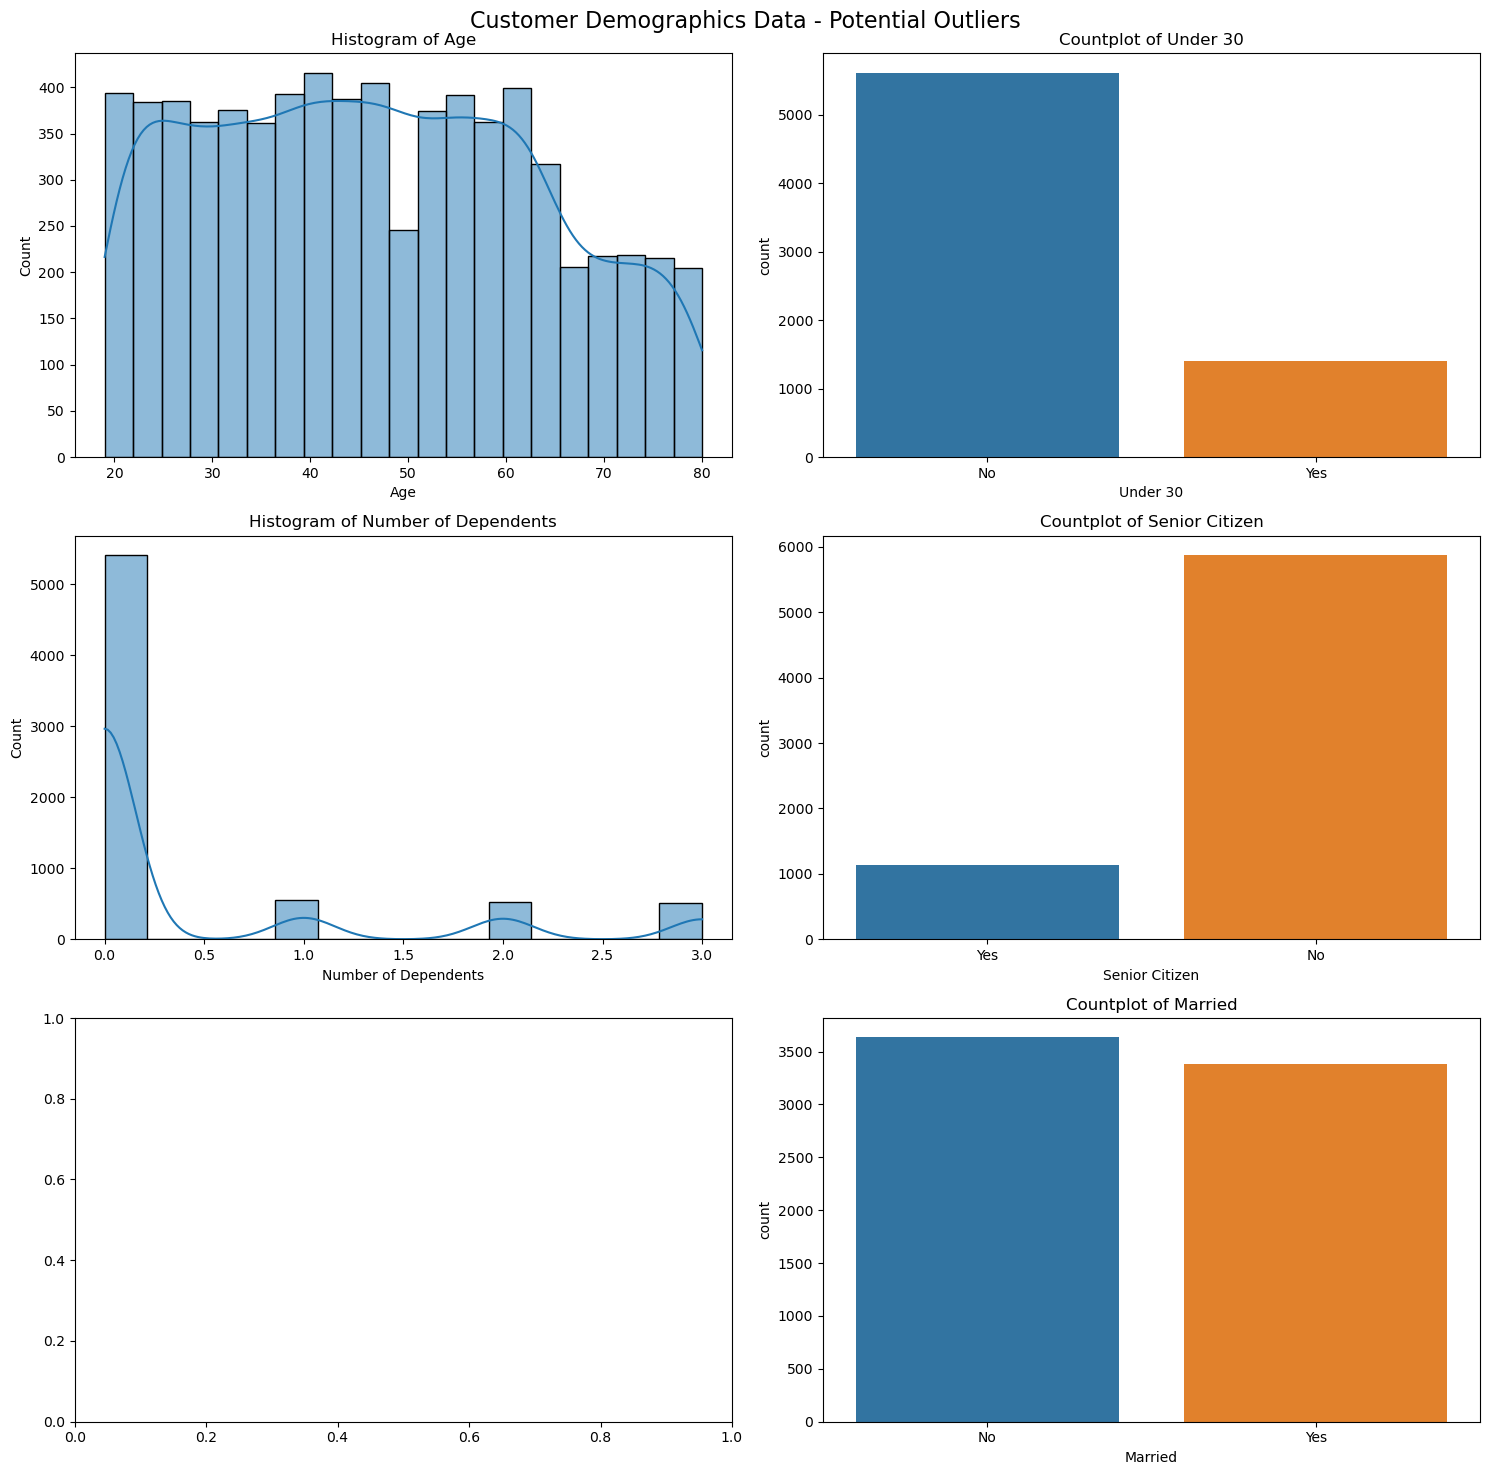

c:\Users\megar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


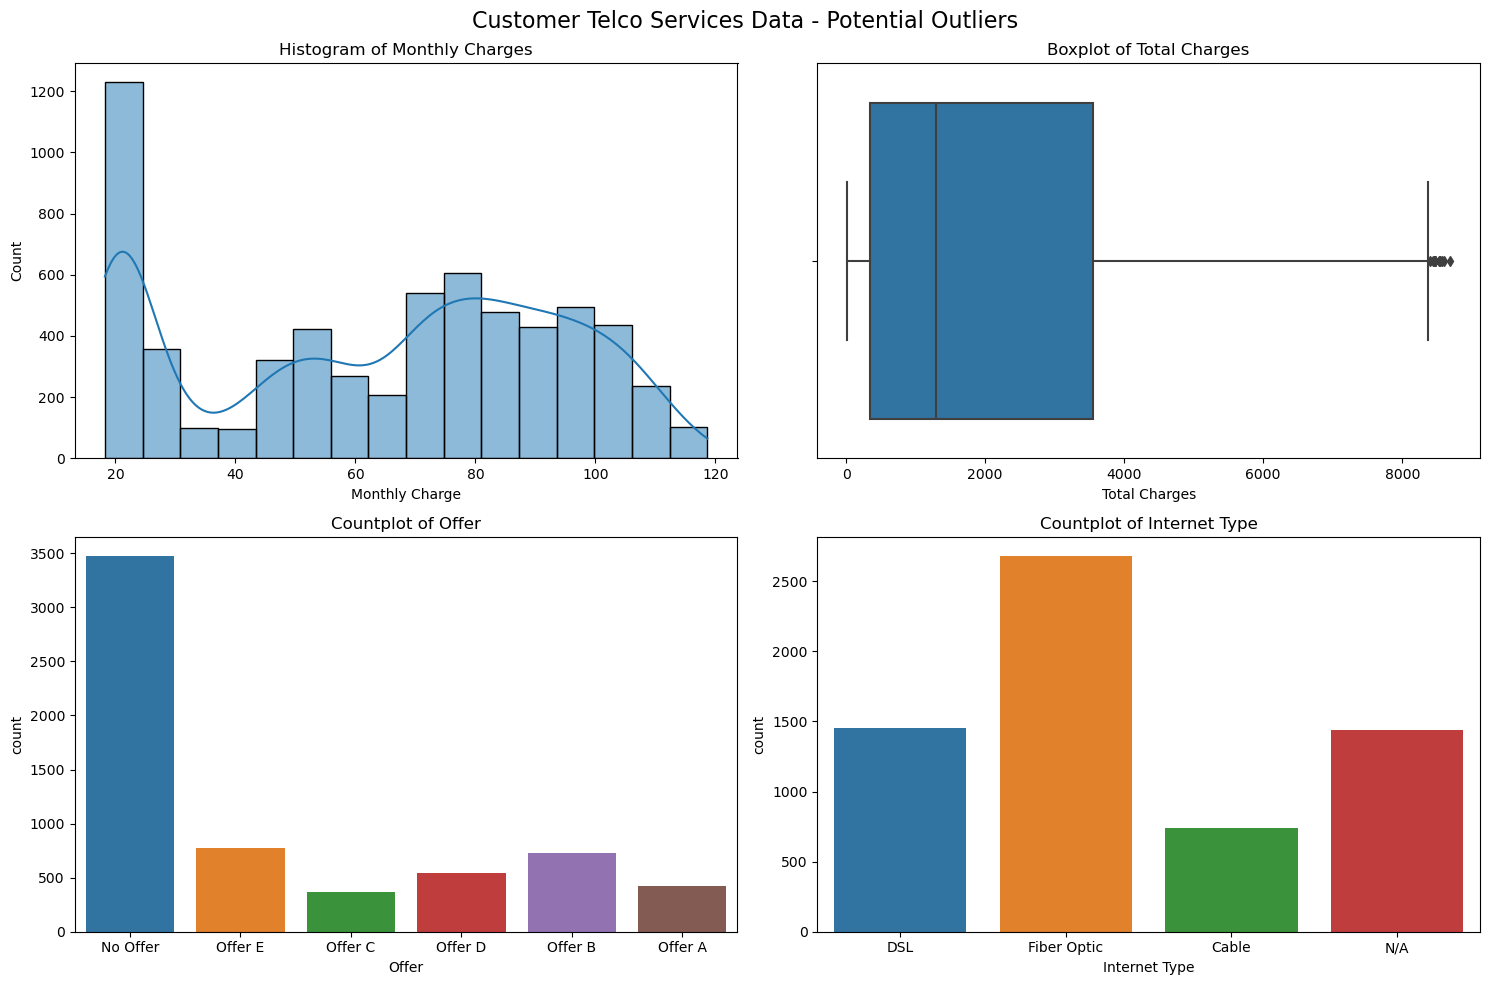

c:\Users\megar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


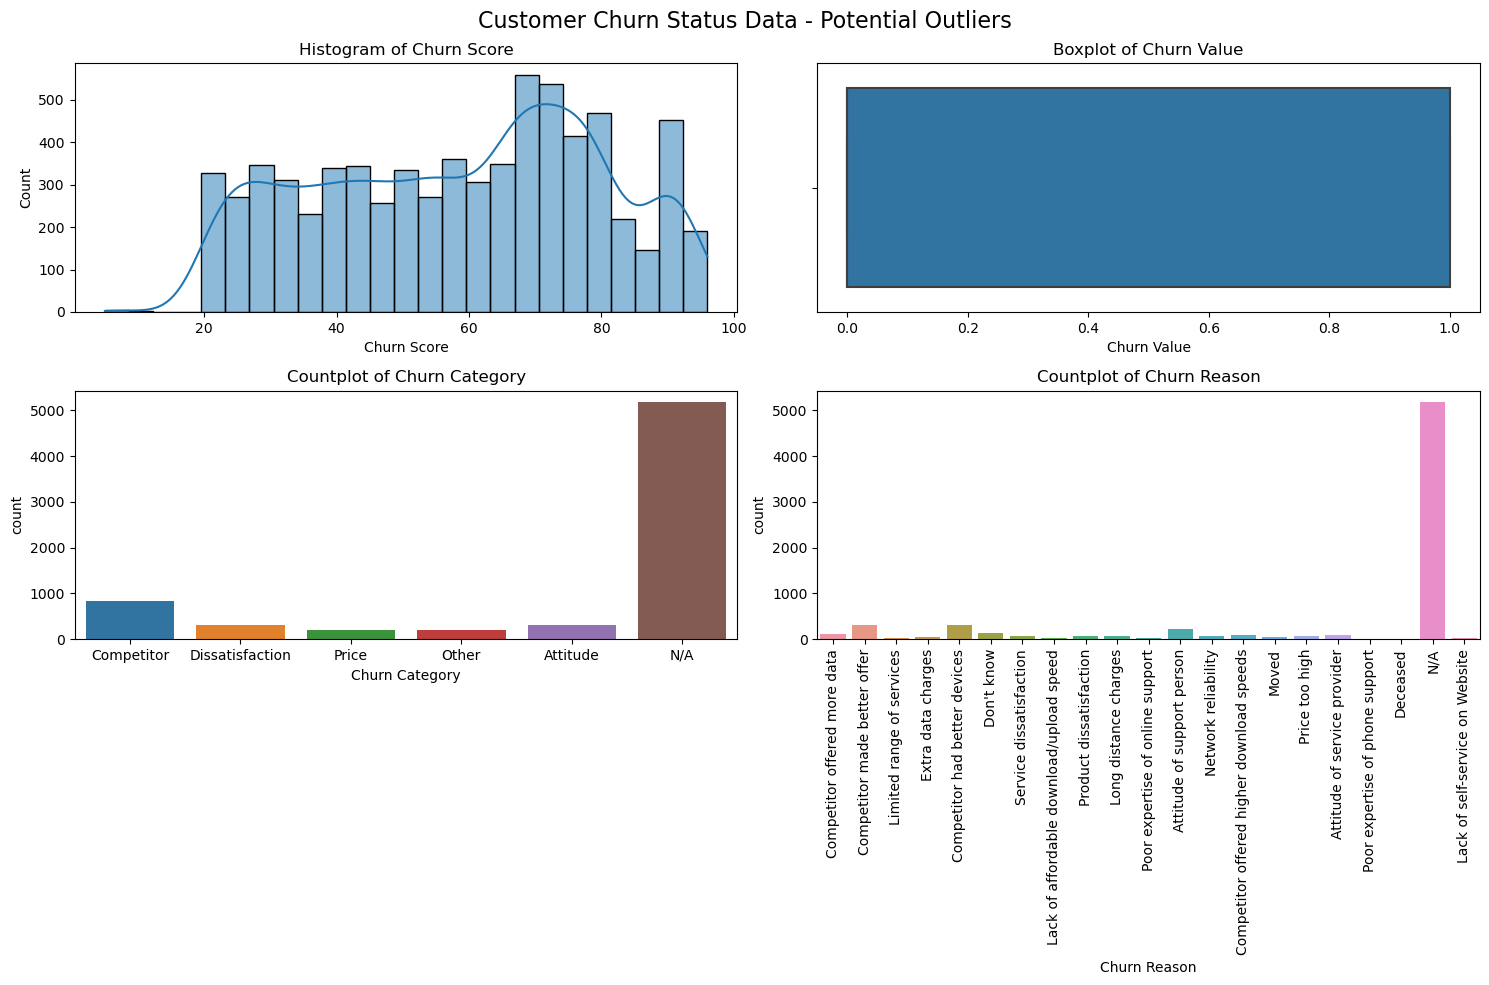

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Customer Demographics Data - Potential Outliers', fontsize=16)

numerical_features = ['Age', 'Number of Dependents']
for i, feature in enumerate(numerical_features):
    sns.histplot(df_customer_demographics[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {feature}')

binary_categorical_features = ['Under 30', 'Senior Citizen', 'Married']
for i, feature in enumerate(binary_categorical_features):
    sns.countplot(x=feature, data=df_customer_demographics, ax=axes[i, 1])
    axes[i, 1].set_title(f'Countplot of {feature}')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Customer Telco Services Data - Potential Outliers', fontsize=16)

sns.histplot(df_customer_telco_services['Monthly Charge'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Histogram of Monthly Charges')

sns.boxplot(x='Total Charges', data=df_customer_telco_services, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Total Charges')

sns.countplot(x='Offer', data=df_customer_telco_services, ax=axes[1, 0])
axes[1, 0].set_title('Countplot of Offer')

sns.countplot(x='Internet Type', data=df_customer_telco_services, ax=axes[1, 1])
axes[1, 1].set_title('Countplot of Internet Type')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Customer Churn Status Data - Potential Outliers', fontsize=16)

sns.histplot(df_customer_churn_status['Churn Score'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Histogram of Churn Score')

sns.boxplot(x='Churn Value', data=df_customer_churn_status, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Churn Value')

sns.countplot(x='Churn Category', data=df_customer_churn_status, ax=axes[1, 0])
axes[1, 0].set_title('Countplot of Churn Category')

sns.countplot(x='Churn Reason', data=df_customer_churn_status, ax=axes[1, 1])
axes[1, 1].set_title('Countplot of Churn Reason')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
